In [99]:
import numpy as np;
import matplotlib;
import matplotlib.pyplot as plt;
import sklearn as skl;
from sklearn.linear_model import LinearRegression;

In [100]:
import csv
import datetime

date = []
temp = []

with open('../../data/data.csv') as data_file:
    csv_reader = csv.reader(data_file, delimiter=',')
    for row in csv_reader:
        date.append(row[0])
        temp.append(float(row[1]))

data_points_count = 12 * 50
future_data_points_count = 12 * 30
x = np.array(list(range(0, data_points_count))).reshape((-1, 1));
y = np.array(temp[-1 * data_points_count:]);

formatted_dates = [datetime.datetime.strptime(d, '%Y%m') for d in date[-1 * data_points_count:]]
for i in range(future_data_points_count):
    formatted_dates.append(formatted_dates[-1] + datetime.timedelta(months=+1))


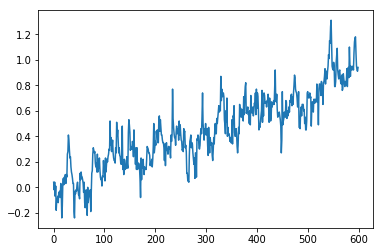

In [101]:
plt.plot(x,y)
plt.show()

In [102]:
model = LinearRegression();
model.fit(x, y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

r_sq = model.score(x, y)
print(r_sq)

intercept: -0.010414198557959164
slope: [0.00151563]
0.7982243409547739


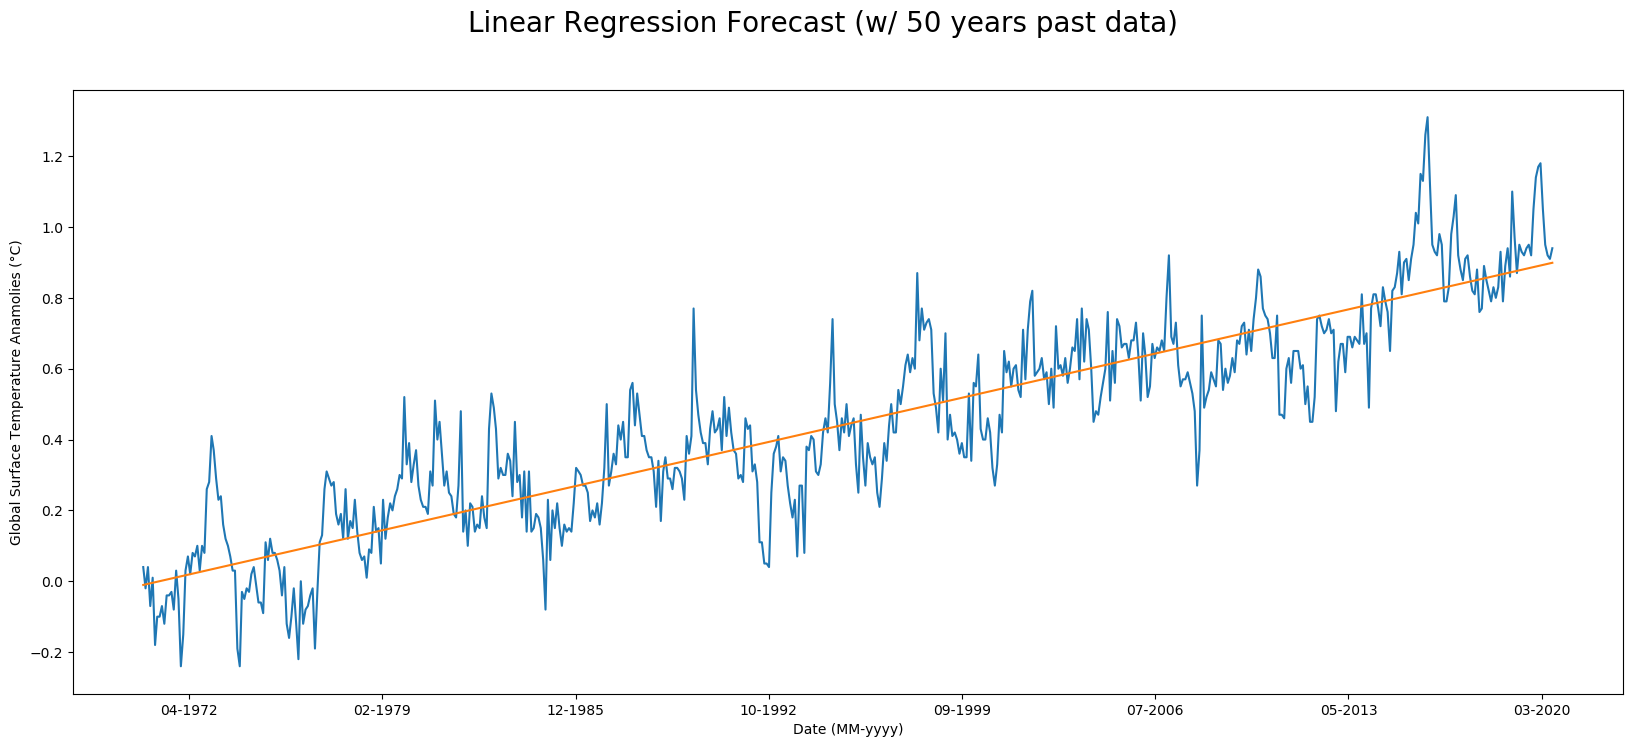

In [104]:
x_dates = matplotlib.dates.date2num(formatted_dates)
formatted_x_dates = matplotlib.dates.DateFormatter('%m-%Y')
fig = plt.figure(figsize=(20, 8), dpi=100, facecolor='w', edgecolor='k')
fig.suptitle(f'Linear Regression Forecast (w/ {int(data_points_count/12)} years past data)', fontsize=20)
subPlot = fig.add_subplot(1,1,1)
subPlot.xaxis.set_major_formatter(formatted_x_dates)
subPlot.plot(x_dates, y)
subPlot.xaxis.set_major_formatter(formatted_x_dates)
subPlot.set_xlabel('Date (MM-yyyy)')
subPlot.set_ylabel('Global Surface Temperature Anamolies (°C)')
subPlot.plot([x_dates[0], x_dates[data_points_count-1]], [model.intercept_, model.coef_ * (data_points_count) + model.intercept_])
# subPlot.plot([x_dates[0], x_dates[data_points_count + 30 * 12]], [model.intercept_, model.coef_ * (data_points_count + 30 * 12) + model.intercept_])
plt.show()